In [1]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tfds.__version__

'4.6.0'

In [3]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

#train_dataset =  train_dataset.cache()
#test_dataset  =  test_dataset.cache()

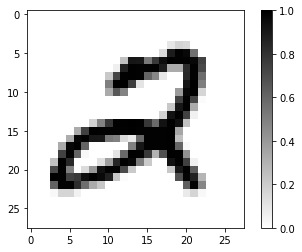

In [5]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

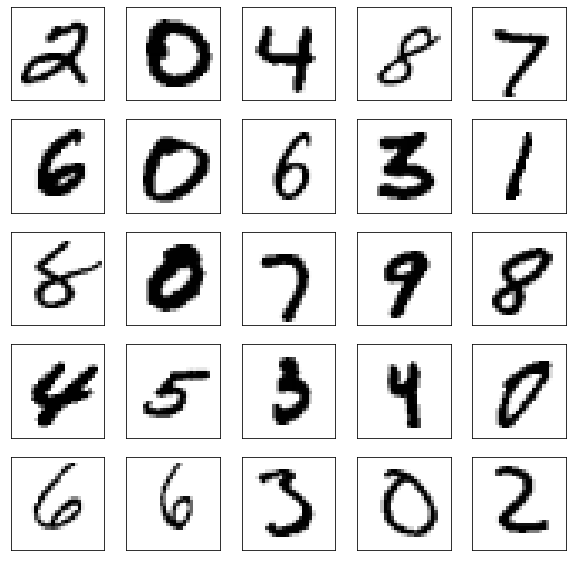

In [6]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [7]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [8]:
print (train_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [35]:
hist = model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 81s 43ms/step - loss: 7.4394e-04 - accuracy: 0.9998
Epoch 2/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0020 - accuracy: 0.9997
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 5/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 6/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 7/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 8/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0025 - accuracy: 0.9996
Epoch 9/10
1875/1875 [==============================] - 81s 43ms/step - loss: 9.5512e-04 - accuracy: 0.9998
Epoch 10/10
1875/1875 [==============================] -

In [36]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 0.1015 - accuracy: 0.9926
Accuracy on test dataset: 0.9926000237464905


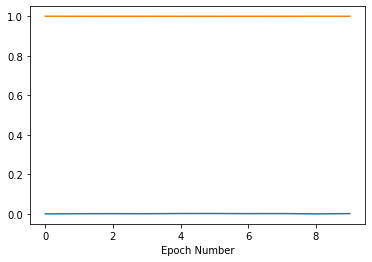

In [37]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.plot(hist.history['loss']);
plt.plot(hist.history['accuracy']);

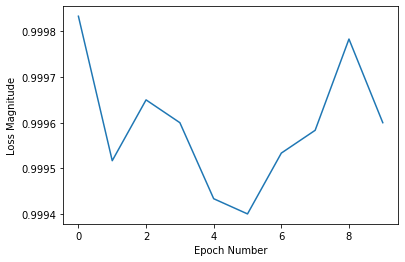

In [38]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['accuracy']);

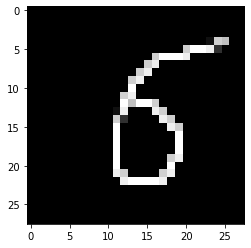

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img2 = cv2.imread('cv6.png', 0)
img2.shape
#img2=cv2.resize(img2,(28,28))
img2.shape
#img2 = cv2.bitwise_not(img2)
plt.imshow(img2,cmap='gray')

In [40]:
img2 = img2 / 255.

In [41]:
np.array([img2]).shape
img2=np.reshape(img2,(28,28,1))

In [42]:
out = model.predict(np.array([img2]))

1/1 [==============================] - 0s 20ms/step


In [43]:
out

array([[ -21.097311,  -56.800232, -104.812355,  -82.683624,  -69.29393 ,
          21.195614,   43.713985, -122.57106 ,   11.05663 ,  -43.86761 ]],
      dtype=float32)

In [44]:
out[0].argmax()

6

In [45]:
img_0=cv2.imread('cv.png',0)
img_2 = cv2.imread('cv2.png', 0)
img_4 = cv2.imread('cv4.png', 0)
img_6 = cv2.imread('cv6.png', 0)
img_7= cv2.imread('cv7.png', 0)

In [46]:
img=[img_0,img_2,img_4,img_6,img_7]
real_value=[0,2,4,6,7]

In [47]:
res=[]
for j in img:
  i=j/255.
  np.array([i]).shape
  i=np.reshape(i,(28,28,1))
  out_ = model.predict(np.array([i]))
  predict=out_[0].argmax()
  #print(out_)
  res.append(predict)
  print(predict)


1/1 [==============================] - 0s 21ms/step
0
1/1 [==============================] - 0s 19ms/step
2
1/1 [==============================] - 0s 19ms/step
4
1/1 [==============================] - 0s 27ms/step
6
1/1 [==============================] - 0s 21ms/step
7


In [48]:
result_=list(zip(real_value, res))

In [49]:
print(res)

[0, 2, 4, 6, 7]


In [50]:
print(result_)

[(0, 0), (2, 2), (4, 4), (6, 6), (7, 7)]


CNN model predict all number True 